# Transformada discreta de Fourier



In [1]:
using LinearAlgebra
using Plots
using FFTW
using Random

## Transformada discreta de Fourier

* A transformada discreta de Fourier é uma versão da série de Fourier para vetores.

* Nesse caso, o vetor é interpretado como uma informação digital colhida a intervalos iguais.

* Por exemplo, o vetor pode representar um sinal de áudio, um sinal de um sismograma, pixels de uma imagem, etc.

* Dado, então, um vetor $x = (x_n)_{n=0}^{N-1}$, onde $N\in \mathbb{N}$ e onde $x_n$ pode ser real ou complexo, a sua **transformada discreta de Fourier** é um novo vetor, complexo, $X = (X_k)_k$ dado por
$$ X_k = \sum_{n=0}^{N-1} x_n e^{\frac{-2\pi i kn}{N}} = \sum_{n=0}^{N-1} x_n \left(\cos\left(\frac{2\pi kn}{N} \right) - i \sin\left(\frac{2\pi kn}{N}\right) \right).
$$

* A transformada inversa é dada por
$$ x_n = \frac{1}{N}\sum_{k=0}^{N-1} X_k e^{\frac{2\pi i nk}{N}}.
$$

### Simetria no caso real

* No caso em que o sinal $x=(x_n)_{n=0}^{N-1}$ é real, temos, para $k=1, \ldots, N-1$,
$$ \begin{align*}
  X_{N-k} & = \sum_{n=0}^{N-1} x_n e^{\frac{-2\pi i (N-k)n}{N}} = \sum_{n=0}^{N-1} x_n e^{-2\pi i n}e^{\frac{2\pi i kn}{N}} = \sum_{n=0}^{N-1} x_n e^{\frac{2\pi i kn}{N}} \\
& = \sum_{n=0}^{N-1} \overline{x_n e^{\frac{-2\pi i kn}{N}}} = \overline{\sum_{n=0}^{N-1} x_n e^{\frac{-2\pi i k n}{N}}} = \overline{X_k}.
\end{align*}
$$

* Ou seja, $X_{N-k}$ é o complexo conjugado de $X_k$, para $k=1, \ldots, N-1$ (excluindo $k=0$, pois $x_{N-0} = x_N$ não está definido).

### Comparação com a série de Fourier

* Aqui, pensando em uma aplicação futura em sinais de áudio, vamos considerar a variável independente como sendo uma variável temporal, denotada por $t$. E o sinal vamos denotar por $x=x(t)$.

* Vimos que a série de Fourier de uma função $T$-periódica $x=x(t)$ em exponenciais complexas é dada por
$$ x(t) = \sum_{k\in \mathbb{Z}} c_k e^{\frac{i 2k\pi t}{T}}.
$$

* Nesse caso, os coeficientes complexos $c_k$ podem ser escritos como
$$ c_k = \frac{1}{T}\int_{0}^{T} x(t)e^{-\frac{i 2k\pi t}{T}}\;\mathrm{d}t.
$$

* Se pensarmos em $x_n \approx x(t_n)$ como uma discretização da função $x=x(t)$ em uma malha uniforme $(t_n)_n$, com $\Delta t = t_{n+1}-t_n$ e $N\Delta t = T$, e aproximarmos a integral por uma soma de Riemann, então
$$ c_k \approx \frac{1}{T} \sum_{n=0}^{N-1} x(t_n) e^{\frac{- 2k\pi i t_n}{T}} \Delta t = \frac{1}{N} \sum_{n=0}^{N-1} x_n e^{\frac{-2k\pi i n}{N}} = \frac{X_k}{N}.
$$

### Comparação com a transformada inversa

* Denotando por $[r]$ como o maior inteiro menor do que um dado número real $r$ positivo, temos
$$ x_n = \frac{1}{N}\sum_{k=0}^{N-1} X_k e^{\frac{2\pi i nk}{N}} = \frac{1}{N}\sum_{k=0}^{[N/2]} X_k e^{\frac{2\pi i nk}{N}} + \frac{1}{N}\sum_{k=[N/2]+1}^{N-1} X_k e^{\frac{2\pi i nk}{N}}.
$$

* Escrevemos $k = N - j$ no segundo somatório.

* Temos, em um extremo, $k = N - j = N - 1$ em $j = 1$.

* No outro extremo, $k = N - j = [N/2] + 1$ em $j = N - [N/2] - 1 = [(N-1)/2]$.

* De fato, considerando $N$ ímpar, temos $N = 2M+1$ para algum inteiro positivo $M$, logo 
$$ [N/2] = [2M/2 + 1/2] = M = (N-1)/2,
$$
o que nos dá 
$$j = N - [N/2] - 1 = 2M+1 - M - 1 =  M = (N-1)/2 = [N-1/2].
$$

* Agora, se $N=2M$, então 
$$ [N/2] = M = N/2, \quad \text{e} \quad  [(N-1)/2] = [ (2M - 1)/2] = [M - 1/2] = M - 1,
$$
o que nos dá 
$$j = N - [N/2] - 1  = 2M - M - 1 = M - 1 = [(N-1)/2].$$

### Continuando

* Assim,
$$ \begin{align*}
x_n & = \frac{1}{N}\sum_{k=0}^{[N/2]} X_k e^{\frac{2\pi i nk}{N}} + \frac{1}{N}\sum_{j=1}^{[(N-1)/2]} X_{N-j} e^{\frac{2\pi i n(N-j)}{N}} \\
 & = \frac{1}{N}\sum_{k=0}^{[N/2]} X_k e^{\frac{2\pi i nk}{N}} + \frac{1}{N}\sum_{j=1}^{[(N-1)/2]} \overline{X_j}e^{\frac{-2\pi j nk}{N}} \\
 & = \frac{1}{N}\sum_{k=0}^{[N/2]} X_k e^{\frac{2\pi i nk}{N}} + \frac{1}{N}\sum_{k=-1}^{-[(N-1)/2]}\overline{X_{-k}}e^{\frac{2\pi i nk}{N}}
 \end{align*}
$$

* Usando que $c_k \approx X_k/N$ e que $c_{-k} = \overline{c_k}$, obtemos
$$ \begin{align*}
  x_n & \approx \sum_{k=0}^{[N/2]} c_k e^{\frac{2\pi i nk}{N}} + \sum_{k=-1}^{-[(N-1)/2]}\overline{c_{-k}}e^{\frac{2\pi i nk}{N}} \\
 & = \sum_{k=0}^{[N/2]} c_k e^{\frac{2\pi i nk}{N}} + \sum_{k=-1}^{-[(N-1)/2]} c_k e^{\frac{2\pi i nk}{N}} = \sum_{k=-[(N-1)/2]}^{[N/2]} c_k e^{\frac{2\pi i nk}{N}}.
 \end{align*}
$$

* No caso em que $f$ tenha frequências com número de onda no máximo até $[(N-1)/2]$, então $c_k = 0$, para $|k|> [(N-1)/2]$, de modo que
$$ x(t_n) =  \sum_{k=-[(N-1)/2]}^{[N/2]} c_k e^{\frac{2\pi i nk}{N}} \approx \sum_{k=-[(N-1)/2]}^{[N/2]} \frac{X_k}{N} e^{\frac{2\pi i nk}{N}} = x_n.
$$

* No caso em que $N$ é par, temos, mais explicitamente,
$$ x(t_n) = \sum_{k=-N/2+1}^{N/2} c_k e^{\frac{2\pi i nk}{N}} \approx \sum_{k=-N/2+1}^{N/2} \frac{X_k}{N} e^{\frac{2\pi i nk}{N}} = x_n.
$$

* No caso em que $N$ é impar, temos
$$ x(t_n) = \sum_{k=-(N-1)/2}^{(N-1)/2} c_k e^{\frac{2\pi i nk}{N}} \approx \sum_{k=-(N-1)/2}^{(N-1)/2} \frac{X_k}{N} e^{\frac{2\pi i nk}{N}} = x_n.
$$

### Indexamento no Julia

* Observe que indexamento de vetores em Julia começa em 1 *(1-based indexing)*, como Fortran, MATLAB, Mathematica, Wolfram, Lua, e R. Outras linguagens começam em 0 *(0-based indexing)*, como Python e C, C++, Go, PHP e Rust. (veja uma lista mais completa [Comparison of programming languages (array)](https://en.wikipedia.org/wiki/Comparison_of_programming_languages_(array)).

* Assim, o vetor $x=(x_n)_{n=0}^{N-1}$ é representado por um array $y = (y_i)_{i=1}^N$, assim como a sua transformada discreta de Fourier se torna $Y_j = (Y_j)_{j=1}^M$.

* Uma frequência $\nu = k/T$, com número de onda $k$, corresponde ao índice $j=k+1$.

* A relação $X_{N-k} = \overline{X_k}$, válida para $k=1, \ldots, N-1$, se torna $Y_{N-k+1} = \overline{Y_{k+1}}$.

* A magnitude da onda senoidal com número de onda $k$ é $2|c_k| = 2|X_k|/N = 2|Y_{k+1}|/N$, de $k>1$ e $|c_0|=|X_0|/N = |Y_1|/N$, quando $k=0$.

* O vetor abaixo (no caso $N$ par) forma o espectro de amplitude de $x(t_n)$, associado às frequências $\nu = (0, 1/T, \ldots, (N/2 - 1)/T)$:
$$ Z = \left(\frac{|X_0|}{N}, \frac{2|X_1|}{N}, \ldots, \frac{2|X_{N/2-1}|}{N}\right)
$$

### Transformada rápida de Fourier

* Uma **transformada rápida de Fourier** é um algoritmo eficiente de cálculo da transformada discreta de Fourier. Há vários algoritmos.

* O cálculo direto, via cálculo do somatório para cada coeficiente, é um tanto custoso, da ordem de $\mathcal{O}(N^2).$

* As transformadas rápidas, por sua vez, tem um custo da ordem $\mathcal{O}(N\log N)$.

* Em Julia, a transformada rápida de Fourier é implementado no pacote [JuliaMath/FFTW.jl](https://github.com/JuliaMath/FFTW.jl), que é, na verdade, uma interface para a biblioteca [FFTW](http://www.fftw.org), denotada assim pelo acrônimo de *"Fastest Fourier Transform in the West"*.

* A FFTW contém, na verdade, diversos algoritmos de FFT. A própria biblioteca analisa o tipo de transformada que está sendo feita e escolhe o algoritmo mais rápido para o caso.

* Há algoritmos para transformadas discretas reais, complexas, de dados simétricos ou anti-simétricos e de senos ou de cossenos.

* Nos exemplos abaixo, vamos nos retringir às funções `fft`, que calcula a transformada complexa, conforme discutido acima, e `rfft`, que é a versão real, que pode ser usada no caso em que o seu sinal é real, e retornando apenas os índices de $0$ a $[N/2]$, considerando-se que os restantes serão complexos conjugados desses.

## Exemplos

### Exemplo de sinal constante

In [2]:
fs = 440
Tf = 1.0
tempos = 0.0:inv(fs):Tf
N = length(tempos) # N = fs + 1 se T == 1
freqs = 0:div(N,2)/Tf
nothing

In [3]:
k = 0 # número de onda
ν = k/Tf # frequência
A = 0
B = 4
x = A*sin.(2π*ν*tempos) + B*cos.(2π*ν*tempos) # onda senoidal pura, de frequência ν
W = √(A^2 + B^2) # amplitude da onda
nothing

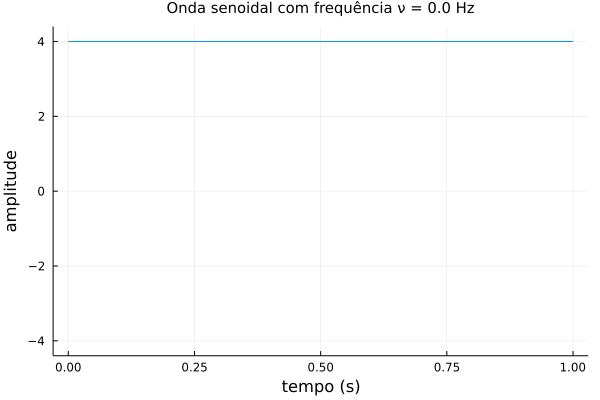

In [4]:
plot(tempos, x, xlabel = "tempo (s)", ylabel="amplitude", label=nothing, ylims=(-1.1W,1.1W),
    title="Onda senoidal com frequência ν = $ν Hz", titlefont = 10)

In [5]:
X = fft(x)
Xr = rfft(x)
maximum(abs.(X[1:length(Xr)] - Xr))

5.411807174143749e-14

In [6]:
Z = [abs(Xr[1])/N; 2abs.(Xr[2:end])/N]

println("Amplitude dada diretamente no espaço físico: W = $W")
println("Amplitude calculada via FFT: |X_k|/N = $(Z[1+k])")

Amplitude dada diretamente no espaço físico: W = 4.0
Amplitude calculada via FFT: |X_k|/N = 4.0


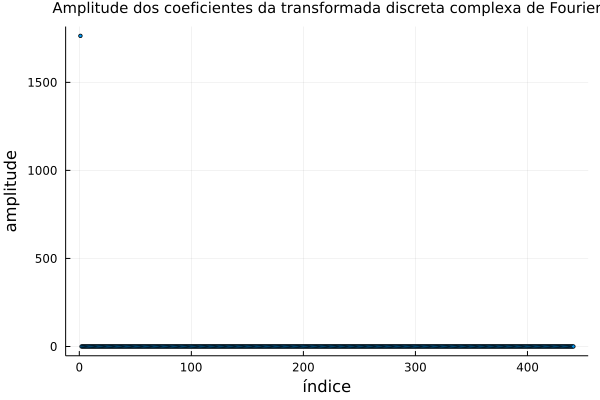

In [7]:
scatter(abs.(X), markersize=2, label=nothing, xlabel="índice", ylabel="amplitude",
    title="Amplitude dos coeficientes da transformada discreta complexa de Fourier", titlefont=10)

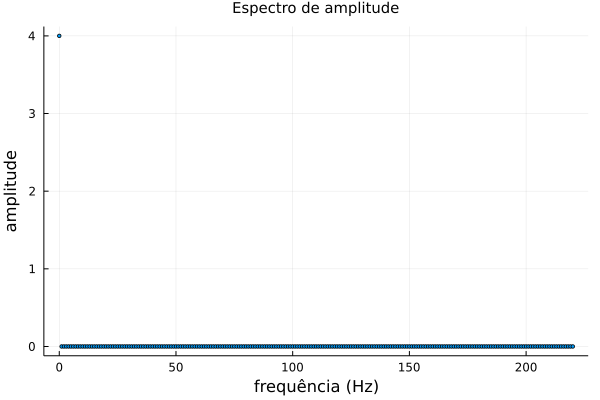

In [8]:
scatter(freqs, Z, markersize=2, legend=nothing, xlabel="frequência (Hz)", ylabel="amplitude",
    title="Espectro de amplitude", titlefont=10)

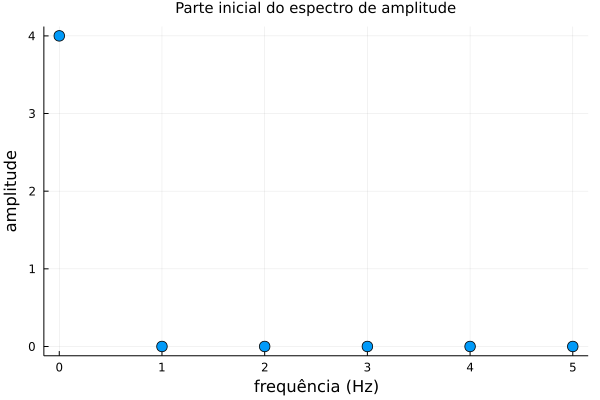

In [9]:
scatter(freqs[1:6], Z[1:6], markersize=6, legend=nothing, xlabel="frequência (Hz)", ylabel="amplitude",
    title="Parte inicial do espectro de amplitude", titlefont=10)

### Exemplo de onda senoidal pura

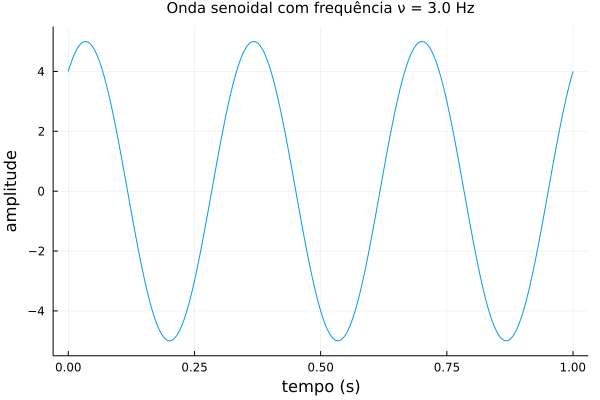

In [10]:
k = 3 # número de onda
ν = k/Tf # frequência
A = 3
B = 4
x = A*sin.(2π*ν*tempos) + B*cos.(2π*ν*tempos) # onda senoidal pura, de frequência ν
W = √(A^2 + B^2) # amplitude da onda
plot(tempos, x, xlabel = "tempo (s)", ylabel="amplitude", label=nothing, ylims=(-1.1W,1.1W),
    title="Onda senoidal com frequência ν = $ν Hz", titlefont = 10)

In [11]:
X = fft(x)
Xr = rfft(x)
maximum(abs.(X[1:length(Xr)] - Xr))

1.1368683772161603e-13

In [12]:
Z = [abs(Xr[1])/N; 2abs.(Xr[2:end]/N)]

println("Amplitude dada diretamente no espaço físico: W = $W")
println("Amplitude calcula via FFT: |X_k|/N = $(Z[1+k])")

Amplitude dada diretamente no espaço físico: W = 5.0
Amplitude calcula via FFT: |X_k|/N = 5.001210101433121


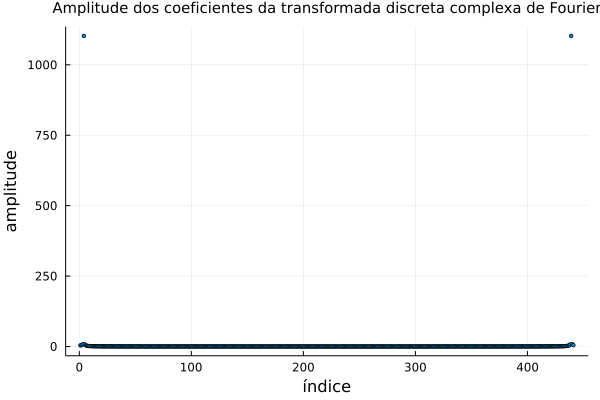

In [13]:
scatter(abs.(X), markersize=2, label=nothing, xlabel="índice", ylabel="amplitude",
    title="Amplitude dos coeficientes da transformada discreta complexa de Fourier", titlefont=10)

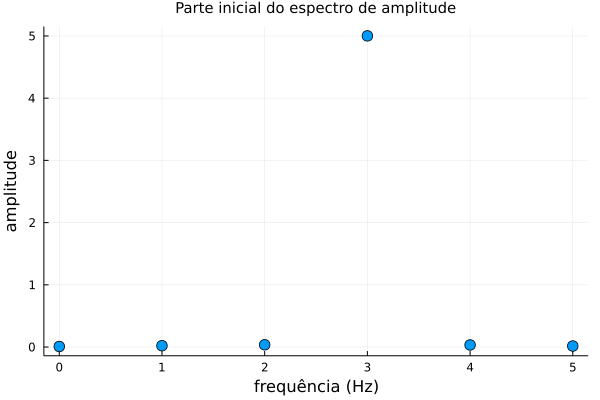

In [14]:
scatter(freqs[1:6], Z[1:6], markersize=6, legend=nothing, xlabel="frequência (Hz)", ylabel="amplitude",
    title="Parte inicial do espectro de amplitude", titlefont=10)

### Exemplo de combinação de frequências

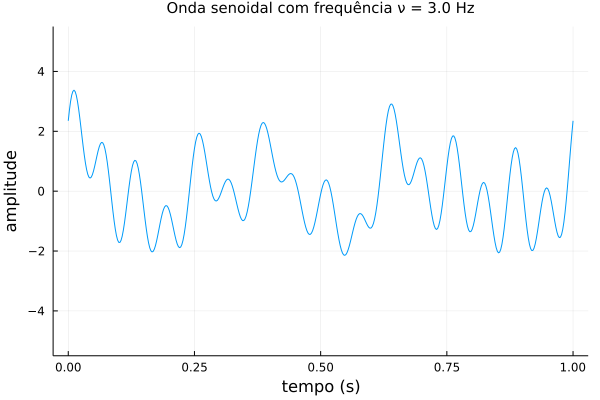

In [15]:
ks = (3, 5, 8, 16, 17) # número de onda
νs = ks./Tf # frequências
As = rand(MersenneTwister(358),length(ks))
Bs = rand(length(ks))
x = sum([A * sin.(2π*ν*tempos) + B*cos.(2π*ν*tempos) for (A,B,ν) in zip(As, Bs, νs)]) 
Ws = sqrt.(As.^2 .+ Bs.^2)
plot(tempos, x, xlabel = "tempo (s)", ylabel="amplitude", label=nothing, ylims=(-1.1W,1.1W),
    title="Onda senoidal com frequência ν = $ν Hz", titlefont = 10)

In [16]:
X = fft(x)
Xr = rfft(x)
maximum(abs.(X[1:length(Xr)] - Xr))

2.874927358989361e-14

In [17]:
Z = [abs(Xr[1])/N; 2abs.(Xr[2:end]/N)]

println("Amplitudes dadas diretamente no espaço físico: W = $Ws")
println("Amplitudes calculadas via FFT: |X_k|/N = $([Z[i+1] for i in ks])")

Amplitudes dadas diretamente no espaço físico: W = [0.9301591396464284, 0.5793944182214126, 0.851323693125874, 1.0780421076577291, 0.3142419454141904]
Amplitudes calculadas via FFT: |X_k|/N = [0.9397863088953003, 0.5831051066133764, 0.8529532888338869, 1.082828598142262, 0.27346689524830997]


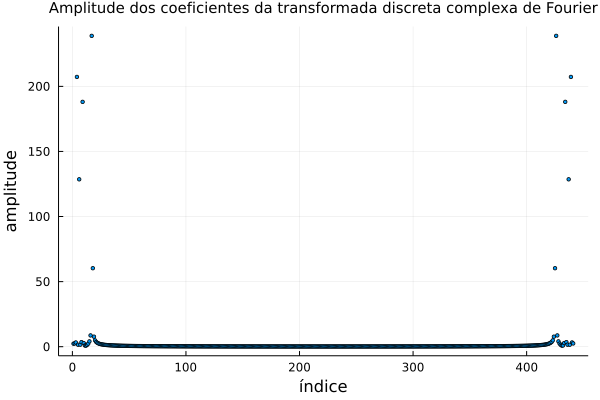

In [18]:
scatter(abs.(X), markersize=2, label=nothing, xlabel="índice", ylabel="amplitude",
    title="Amplitude dos coeficientes da transformada discreta complexa de Fourier", titlefont=10)

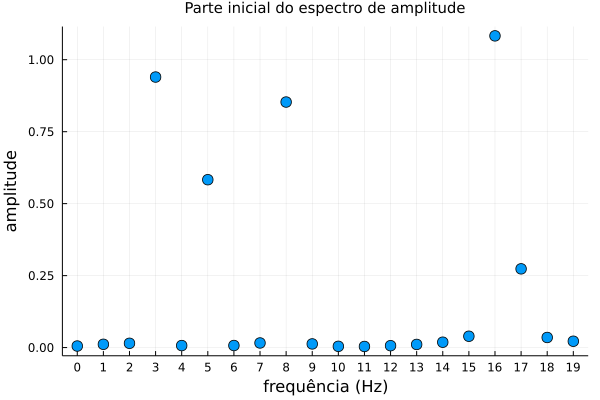

In [19]:
scatter(freqs[1:20], Z[1:20], xticks=freqs[1:20], markersize=6, legend=nothing, xlabel="frequência (Hz)", ylabel="amplitude",
    title="Parte inicial do espectro de amplitude", titlefont=10)

In [20]:
@show length(freqs)
@show length(Xr)
@show length(Z)

length(freqs) = 221
length(Xr) = 221
length(Z) = 221


221

In [21]:
div(N,2)+1

221

## Exercícios

1. Verifique a afirmação de que $x_n \approx f(t_n)$ no caso em que $N$ é par, indicado acima.

1. Mostre que a transformada inversa é, de fato, a inversa da transformada discreta de Fourier, i.e.
$$ \frac{1}{N}\sum_{k=0}^{N-1} \sum_{j=0}^{N-1} x_j e^{\frac{-2\pi i kj}{N}} e^{\frac{2\pi i nk}{N}} = x_n, \qquad n=0, \ldots, N-1.
$$